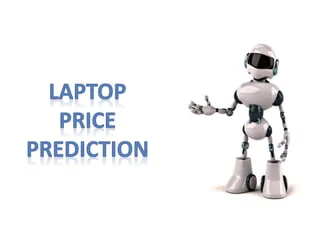

In [347]:
#image of laptop price
from IPython.display import Image
Image('/content/laptop_price_image.png',width=900,height=400)

In [348]:
#import all modulus prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

##load dataset of laptop price

In [349]:
df=pd.read_csv('/content/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [350]:
#shape of dataset
df.shape

(1303, 12)

In [351]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [352]:
#check null values
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [353]:
#check the duplicate value in dataset
df.duplicated().sum()

0

In [354]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


#Feature enginering

In [355]:
#drop the columns Unnamed
df.drop(columns=['Unnamed: 0'],inplace=True)

In [356]:
#ram column remove GB
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [357]:
#change the column type
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [358]:
#value count screen resolution
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [359]:
#extract the resolution from column Touch screen and create new column
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [360]:
#extract ips_panel screen from the screen resolution
df['Ips_panel']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [361]:
#extract resolution x_res, y_res from 1920X1080 only intger in x_res
df['x_res']=df['ScreenResolution'].apply(lambda x:x.split('x')[0])
df['y_res']=df['ScreenResolution'].apply(lambda x:x.split('x')[1])

In [362]:
#extract only integer from this coumn then inplace it using regular expression find  (\d+\.?\d+)
df['x_res']=df['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [363]:
#change trhere datatype
df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

In [364]:
#create new column Pixels per inch(ppi) using x_res and y_res
df['ppi']=(((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches']).astype('int')

In [365]:
#all feature are extracted from screenResolution  drop it
df.drop(columns=['ScreenResolution'],inplace=True)

In [366]:
#now drop the x_res,y_res,Inches because we found the ppi
df.drop(columns=['x_res','y_res','Inches'],inplace=True)

In [367]:
#spit the cpu
df['Cpu'].apply(lambda x:x.split()[0:5]).value_counts()

Cpu
[Intel, Core, i5, 7200U, 2.5GHz]     190
[Intel, Core, i7, 7700HQ, 2.8GHz]    146
[Intel, Core, i7, 7500U, 2.7GHz]     134
[Intel, Core, i7, 8550U, 1.8GHz]      73
[Intel, Core, i5, 8250U, 1.6GHz]      72
                                    ... 
[Intel, Core, M, M3-6Y30, 0.9GHz]      1
[AMD, A9-Series, 9420, 2.9GHz]         1
[AMD, A6-Series, 9220, 2.9GHz]         1
[Intel, Core, i5, 2.0GHz]              1
[AMD, A6-Series, 7310, 2GHz]           1
Name: count, Length: 115, dtype: int64

In [368]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [369]:
df['cpu name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [370]:
#create function on different cpu
def processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [371]:
#different brand of company
df['cpu brand']=df['cpu name'].apply(processor)

In [372]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips_panel,ppi,cpu name,cpu brand
974,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,109218.672,0,0,127,Intel Core i7,Intel Core i7
44,Dell,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53226.720,1,0,127,Intel Core i5,Intel Core i5
84,Acer,Notebook,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5,Windows 10,2.10,21045.600,0,0,100,AMD A9-Series 9420,AMD Processor
290,Acer,Notebook,Intel Celeron Dual Core 3205U 1.5GHz,2,16GB SSD,Intel HD Graphics,Chrome OS,2.19,10602.720,0,0,100,Intel Celeron Dual,Other Intel Processor
873,Lenovo,Notebook,Intel Core i3 7100U 2.4GHz,4,180GB SSD,Intel HD Graphics 620,Windows 10,1.44,39160.800,0,1,165,Intel Core i3,Intel Core i3


In [373]:
#drop cpu and cpu name
df.drop(columns=['Cpu','cpu name'],inplace=True)

In [374]:
#memory value counts
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [375]:
# Ensure 'Memory' column is a string and remove '.0'
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

# Remove 'GB' and convert 'TB' to '000'
df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

# Split the Memory column into two parts if there's a '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Assign first and second parts to new columns and strip any whitespace
df["first"] = new[0].str.strip()
df["second"] = new[1].str.strip() if new.shape[1] > 1 else None

# Apply conditions to create layer columns
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'first'
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Handle cases where 'second' might be NaN
df["second"].fillna("0", inplace=True)

# Apply conditions to create layer columns for 'second'
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'second'
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Replace empty strings with 0 and convert to integers
df["first"] = df["first"].replace('', '0').astype(int)
df["second"] = df["second"].replace('', '0').astype(int)

# Calculate total capacities
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)

In [376]:
#drop memory column
df.drop(columns=['Memory'],inplace=True)

In [377]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips_panel,ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256,0,0


In [378]:
#flash_starage and Hybrid has no impact on price so drop it
df.drop(columns=['Flash_Storage','Hybrid'],inplace=True)

In [379]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips_panel,ppi,cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256


In [380]:
#find correlation of numericl column create df on all numerical
df1=df.select_dtypes(include=['int64','float64'])
#find the correlation that effect the price
df1.corr()['Price']

Price          1.000000
Touchscreen    0.191226
Ips_panel      0.252208
ppi            0.473264
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

In [381]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [382]:
#extract gpu brand from Gpu
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [383]:
#different Gpu brand value counts
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [384]:
#drop the only one Gpu  ARM
df = df[df['Gpu brand'] != 'ARM']

In [385]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [386]:
#now drop the Gpu column
df.drop(columns=['Gpu'],inplace=True)

In [387]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips_panel,ppi,cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256,Intel


In [388]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [389]:
#extract operating system from
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    elif inp == 'Linux':
        return 'Linux'
    elif inp == 'Android':
        return 'Android'
    elif inp == 'Chrome OS':
        return 'ChromeOS'
    else:
        return 'No OS'

In [390]:
#apply rename function on os
df['os']=df['OpSys'].apply(cat_os)

In [391]:
df['os'].value_counts()

os
Windows     1125
No OS         66
Linux         62
ChromeOS      26
Mac           21
Android        2
Name: count, dtype: int64

In [392]:
#drop the OpSys column after extraction of feature
df.drop(columns=['OpSys'],inplace=True)

In [393]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips_panel,ppi,cpu brand,HDD,SSD,Gpu brand,os
440,Lenovo,Notebook,8,2.80,27652.32,0,0,106,AMD Processor,1000,0,AMD,Windows
1099,Asus,Gaming,16,4.30,122490.72,0,1,127,Intel Core i7,1000,128,Nvidia,Windows
571,HP,Notebook,8,1.94,20725.92,0,0,111,Other Intel Processor,2000,0,Intel,Windows
823,MSI,Gaming,8,2.40,63882.72,0,0,141,Intel Core i5,0,256,Nvidia,Windows
649,Lenovo,Ultrabook,8,1.36,84395.52,0,1,176,Intel Core i7,0,256,Intel,Windows


##EDA(Explotary data analysis)

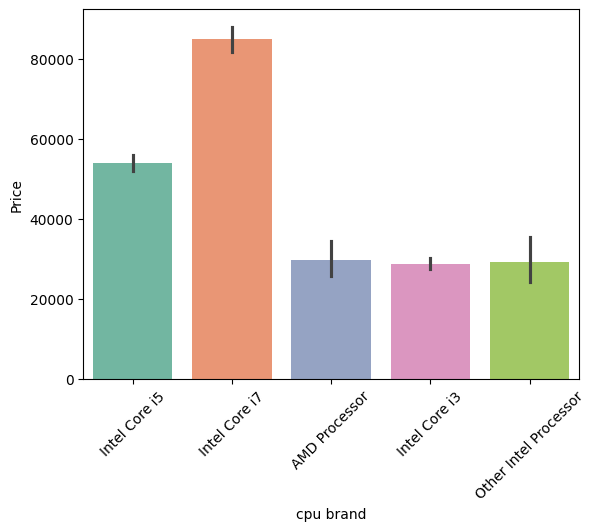

In [394]:
#processor with rewspect to price chart
sns.barplot(x=df['cpu brand'],y=df['Price'],palette='Set2')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

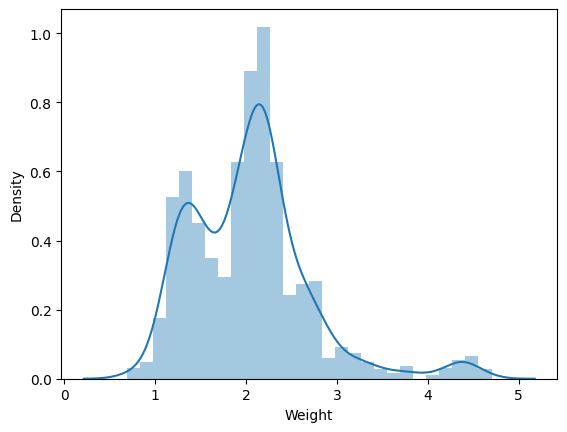

In [395]:
#weight distribution of laptop
sns.distplot(df['Weight'])

<Axes: xlabel='cpu brand'>

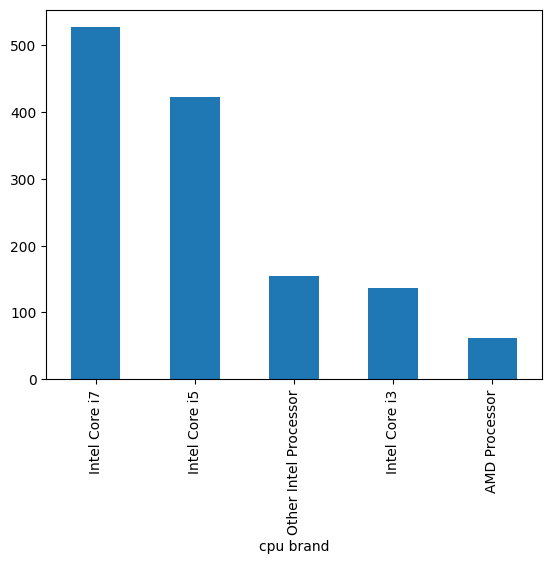

In [396]:
#plot different processor value counts
df['cpu brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram'>

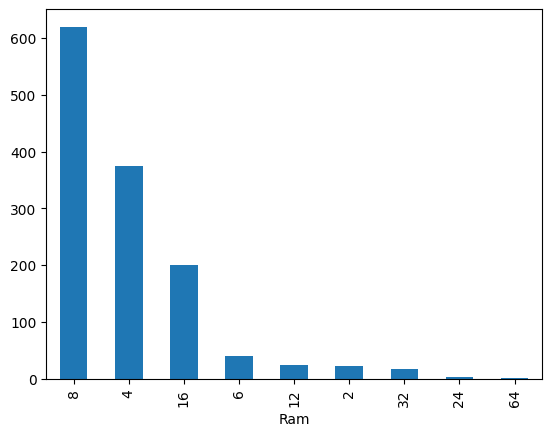

In [397]:
#plot the Ram
df['Ram'].value_counts().plot(kind='bar')

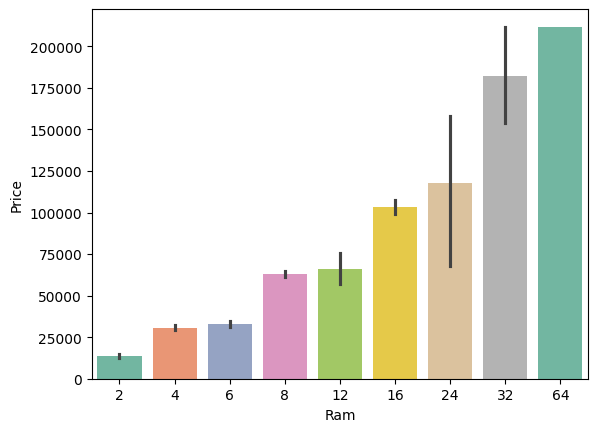

In [398]:
#Ram with respect to price
sns.barplot(x=df['Ram'],y=df['Price'],palette='Set2')
plt.show()

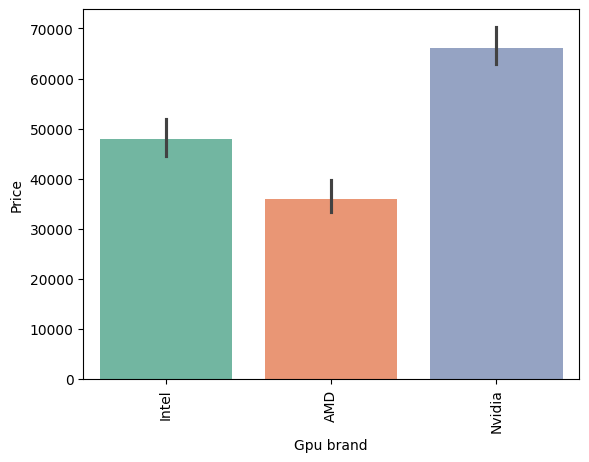

In [399]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median,palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

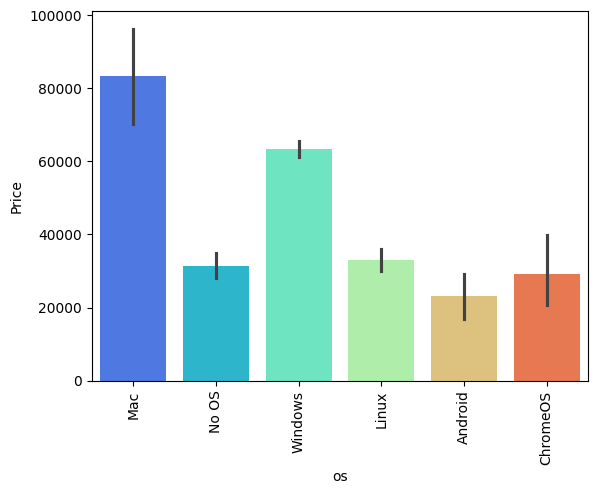

In [400]:
#os affect on price
sns.barplot(x=df['os'],y=df['Price'],palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

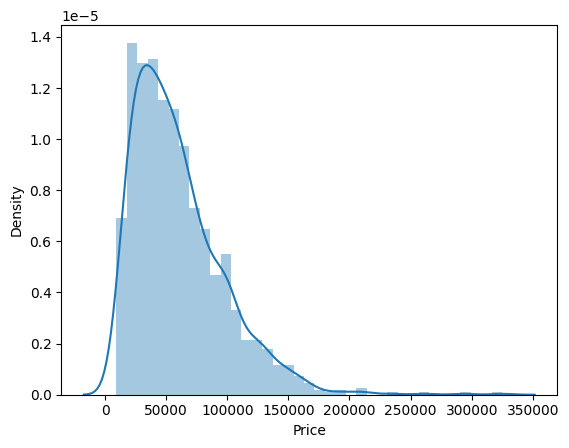

In [401]:
#plot the  laptop price distribution
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

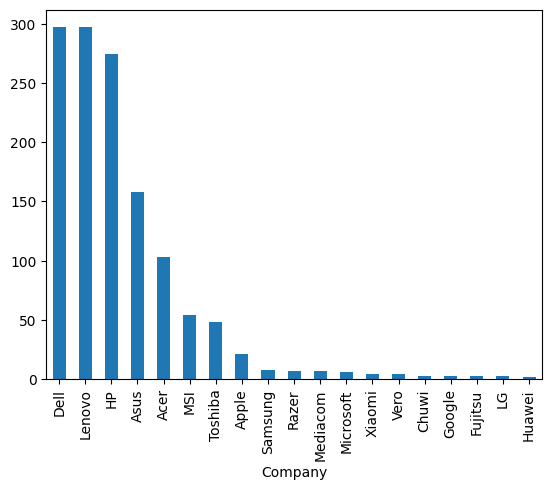

In [402]:
#value count company bar
df['Company'].value_counts().plot(kind='bar')

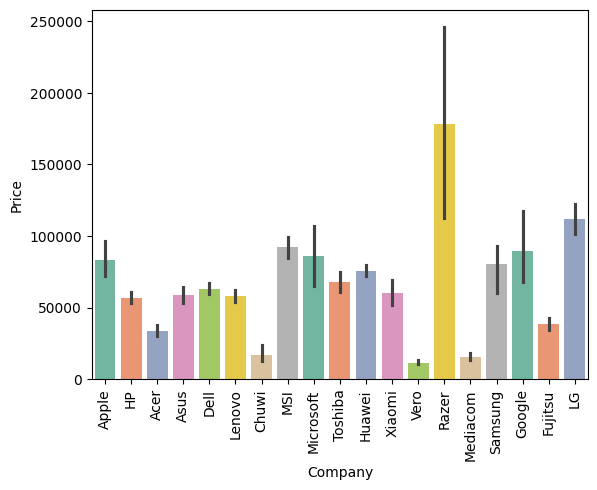

In [403]:
#company with respect to price
sns.barplot(x=df['Company'],y=df['Price'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

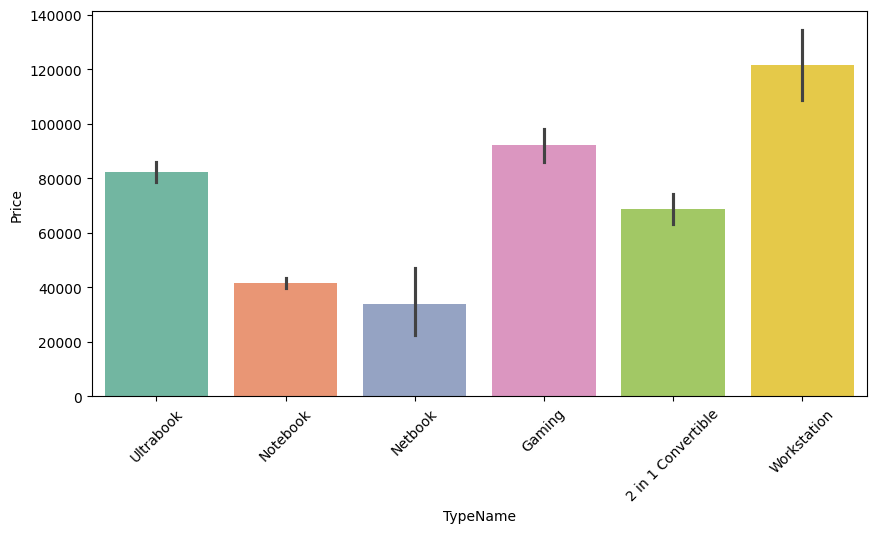

In [404]:
#laptop Type with respecting to price
plt.figure(figsize=(10,5))
sns.barplot(x=df['TypeName'],y=df['Price'],palette='Set2')
plt.xticks(rotation=45)
plt.show()

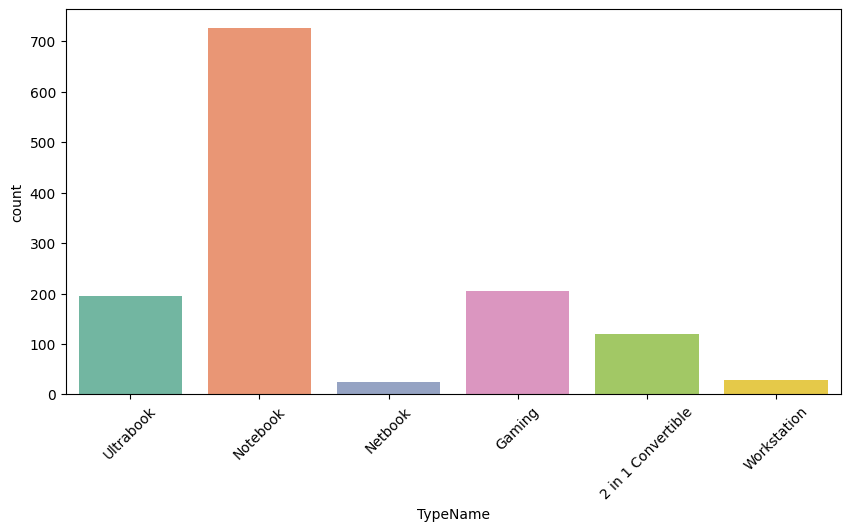

In [405]:
#plot bar on type name column
plt.figure(figsize=(10,5))
sns.countplot(x=df['TypeName'],palette='Set2')
plt.xticks(rotation=45)
plt.show()

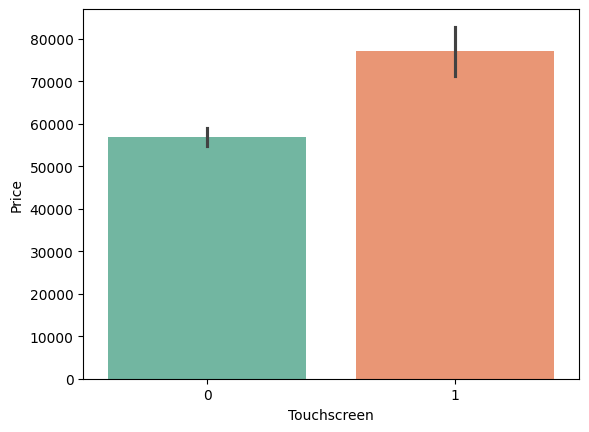

In [406]:
#price comparision on touch_screen and no touch screen
sns.barplot(x=df['Touchscreen'],y=df['Price'],palette='Set2')
plt.show()

<Axes: xlabel='Ips_panel'>

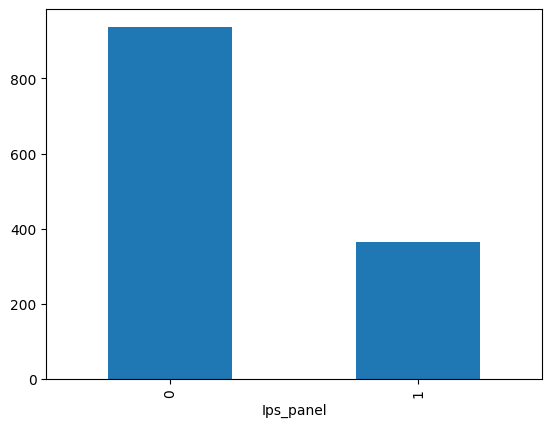

In [407]:
#Number of ips  screen vs no ips
df['Ips_panel'].value_counts().plot(kind='bar')

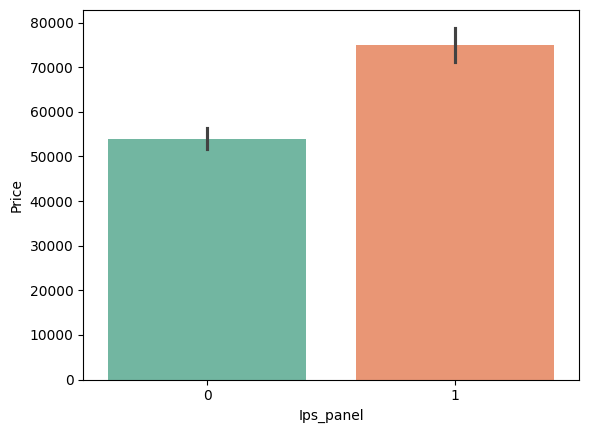

In [408]:
#ips screen effect on price
sns.barplot(x=df['Ips_panel'],y=df['Price'],palette='Set2')
plt.show()

In [409]:
#find correlation of numericl column create df on all numerical
df_n=df.select_dtypes(include=['int64','float64'])
#find the correlation that effect the price
df_n.corr()['Price']

Price          1.000000
Touchscreen    0.192917
Ips_panel      0.253320
ppi            0.475141
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [410]:
#check corrrelation on basis of price
df_n.corr()['Price']

Price          1.000000
Touchscreen    0.192917
Ips_panel      0.253320
ppi            0.475141
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

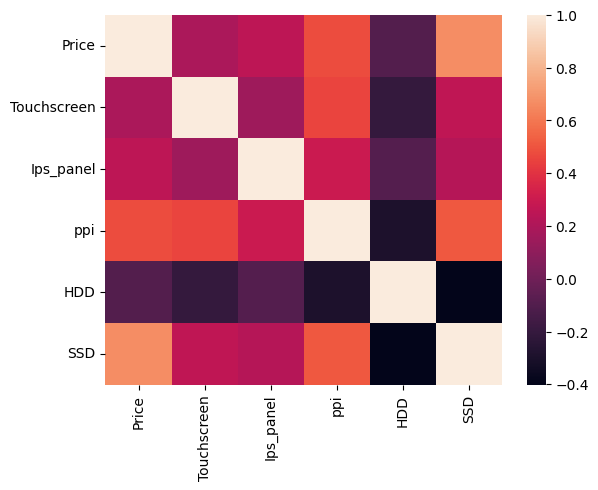

In [411]:
#Heatmap of correlation maps
sns.heatmap(df_n.corr())

In [412]:
#spliting the data on X and y
X=df.drop(columns=['Price'])
y=df['Price']

In [413]:
#split the datset into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

##Model Building to predict the Laptop Price

#Linear regression

In [414]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7194001995429842
MAE 12486.59942027116


#Ridge regression

In [415]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7415973871148986
MAE 12002.09153946282


#Lasso regression

In [416]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7194029667297759
MAE 12486.639296797712


#KNN cluster

In [417]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6577393565297356
MAE 11635.059869387756


#decision Tree

In [418]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.756107859928288
MAE 10851.265342454108


#SVM model

In [419]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5391655539673985
MAE 15434.253475095851


#Random Forest

In [420]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8213405952222075
MAE 9117.89146867411


#Ada Boost

In [421]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5916416582363269
MAE 16991.93469887769


#Gradient Boost

In [422]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7888198893934885
MAE 9233.05963655304


#XgBoost model

In [423]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7849662020568948
MAE 9276.796058657525


#Save the model in pickle file

In [424]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))